# Imports

In [120]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data_path = "hotel_bookings.csv"
df = pd.read_csv(data_path)

df.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,city
0,Resort Hotel - Chandigarh,0,342,2024,July,30,27,0,0,2,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,16:40.9,Chandigarh
1,Resort Hotel - Mumbai,0,737,2024,April,17,28,0,0,2,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,56:21.5,Mumbai
2,Resort Hotel - Delhi,0,7,2024,September,37,10,0,1,1,...,NaN,NaN,0,Transient,75.0,0,0,Check-Out,46:25.7,Delhi
3,Resort Hotel - Kolkata,0,13,2024,August,33,14,0,1,1,...,304.0,NaN,0,Transient,75.0,0,0,Check-Out,07:10.1,Kolkata
4,Resort Hotel - Lucknow,0,14,2024,September,37,14,0,2,2,...,240.0,NaN,0,Transient,98.0,0,1,Check-Out,27:32.5,Lucknow


# Data Preprocessing & Cleaning

In [121]:

df['reservation_status_date'] = pd.to_datetime(
    df['reservation_status_date'],
    errors='coerce'
)


print("Invalid dates:", df['reservation_status_date'].isna().sum())


df.dropna(subset=['reservation_status_date'], inplace=True)


/tmp/ipython-input-766722465.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['reservation_status_date'] = pd.to_datetime(


Invalid dates: 71555


In [122]:
# removing duplicated rows

df.drop_duplicates(inplace=True)

df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

# filling missing values


df['children'].fillna(0, inplace=True)
df['country'].fillna('Unknown', inplace=True)
df['agent'].fillna(0, inplace=True)
df['company'].fillna(0, inplace=True)

df['reservation_year'] = df['reservation_status_date'].dt.year
df['reservation_month'] = df['reservation_status_date'].dt.month
df['reservation_day'] = df['reservation_status_date'].dt.day

# dropping rows with invalid or missing values

df.drop(['reservation_status', 'reservation_status_date'], axis=1, inplace=True)


df['total_stay'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']


/tmp/ipython-input-377583833.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['children'].fillna(0, inplace=True)
/tmp/ipython-input-377583833.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.me

# EDA

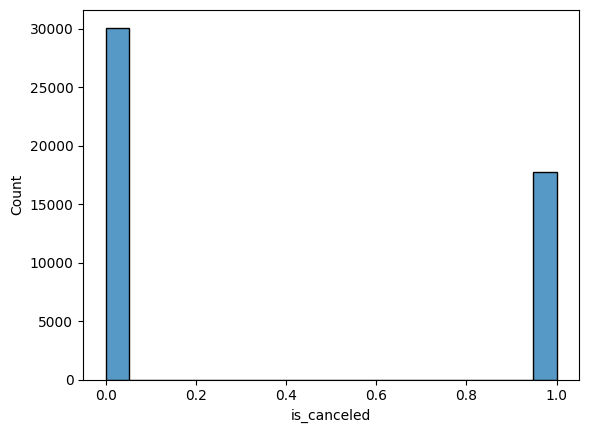

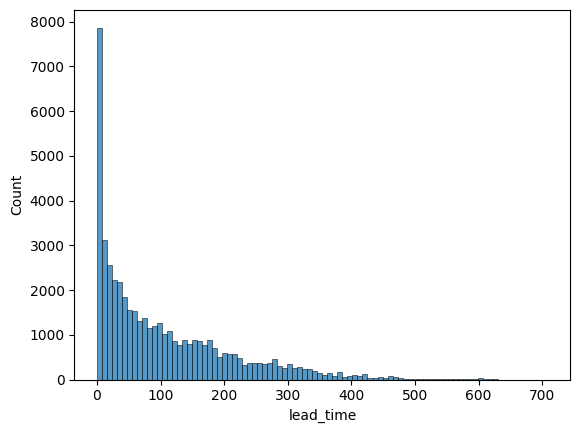

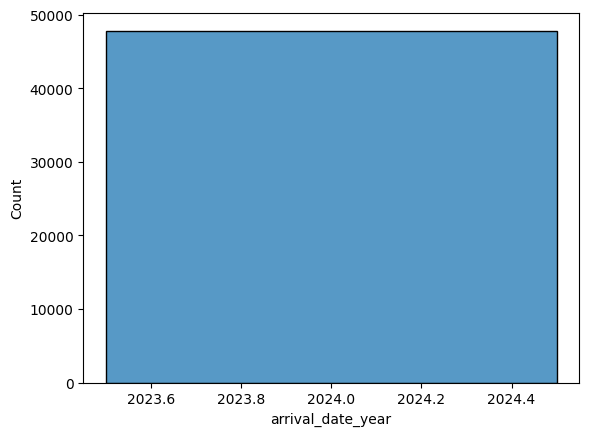

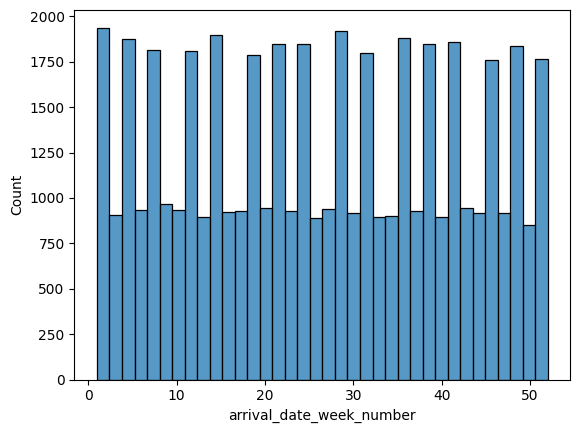

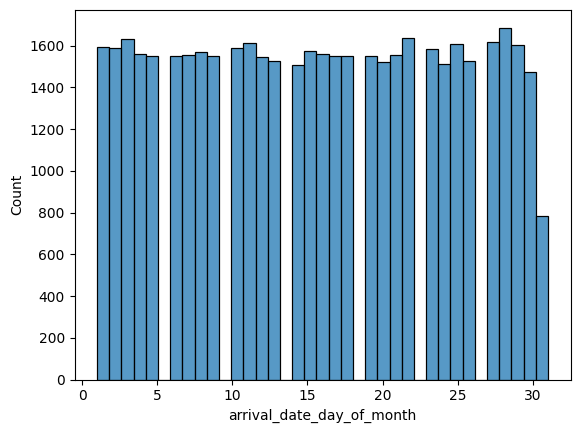

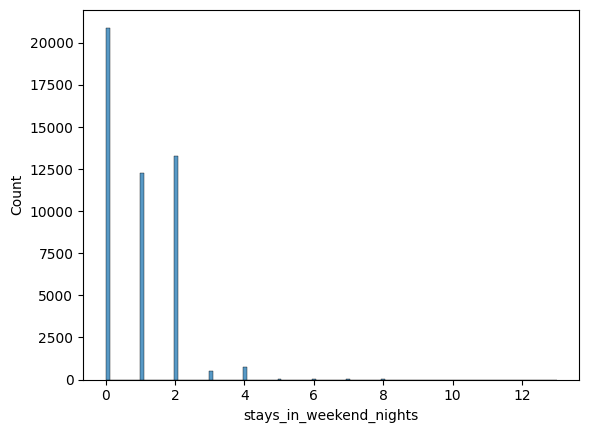

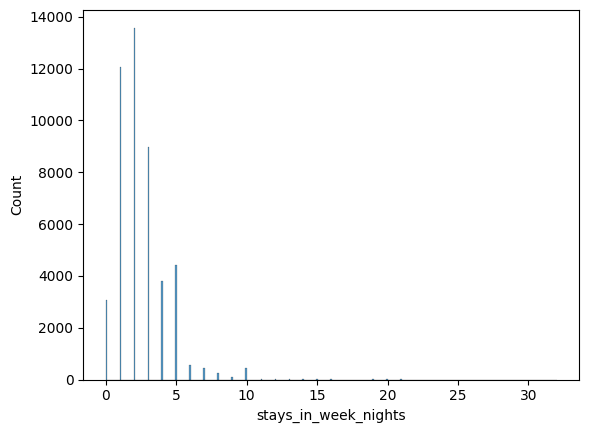

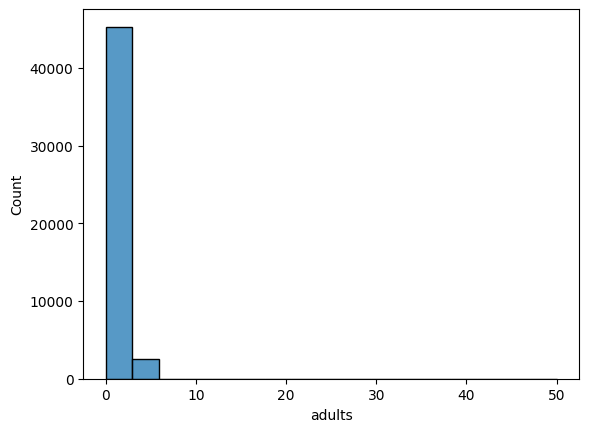

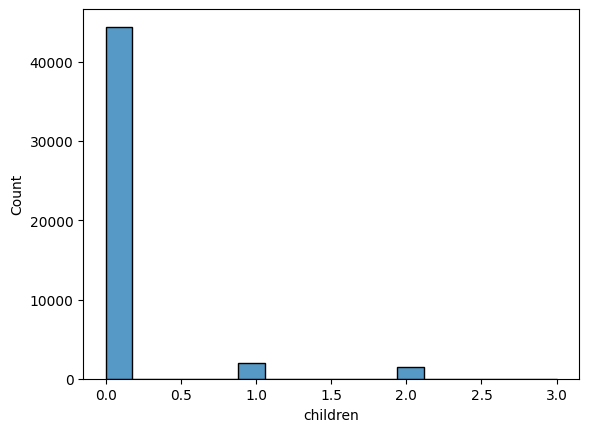

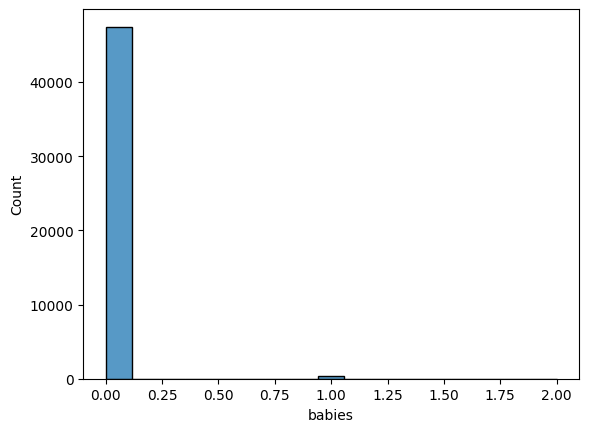

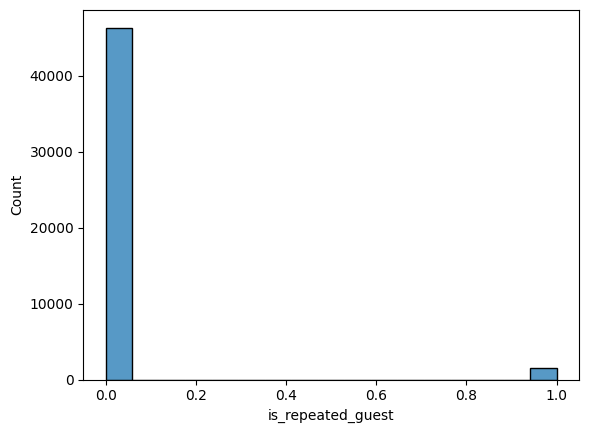

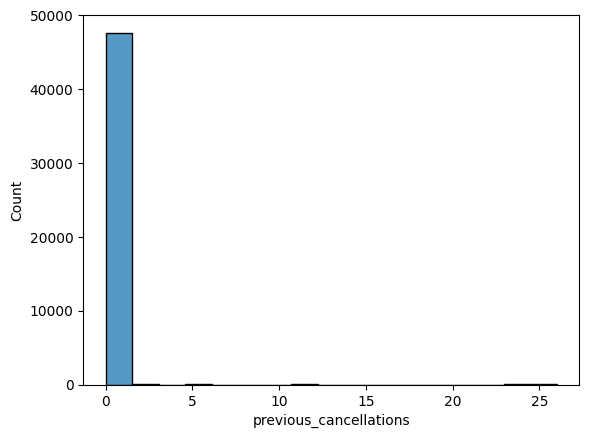

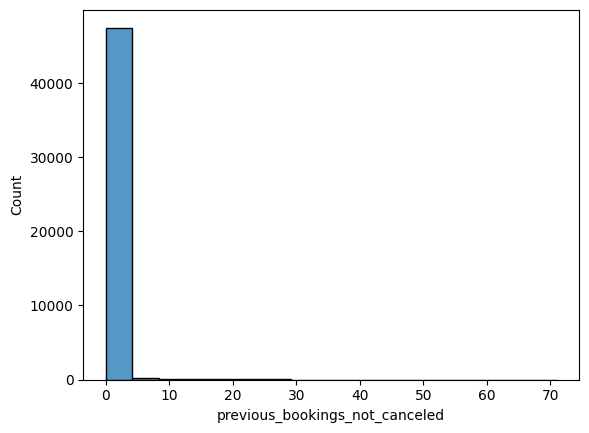

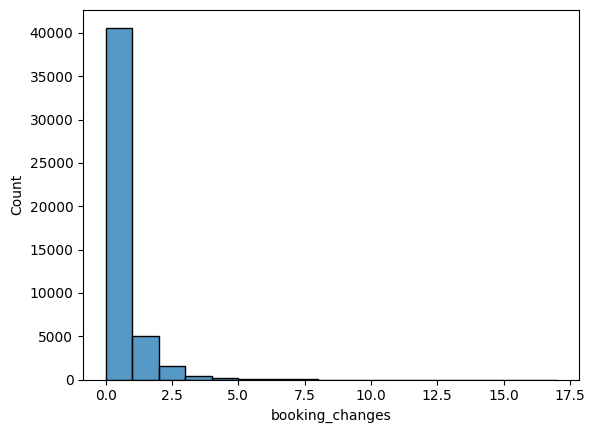

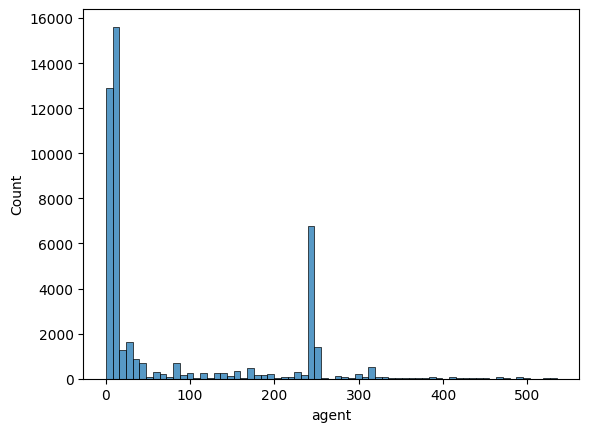

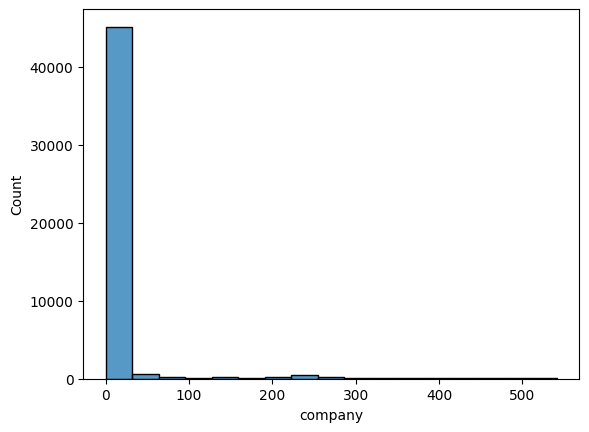

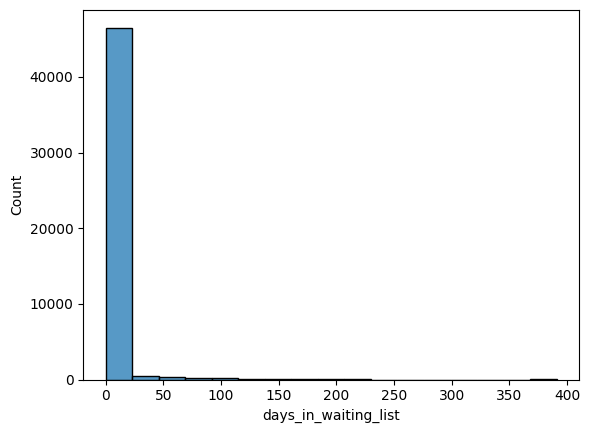

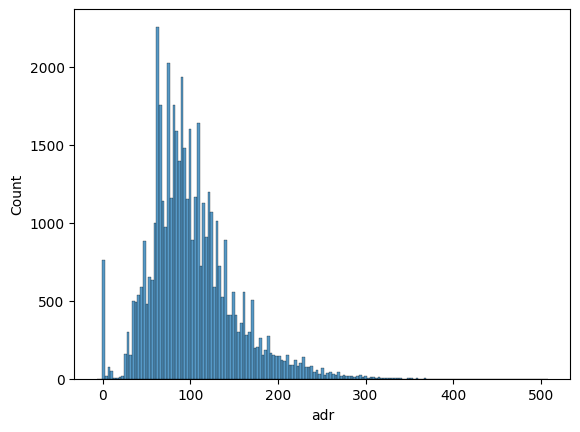

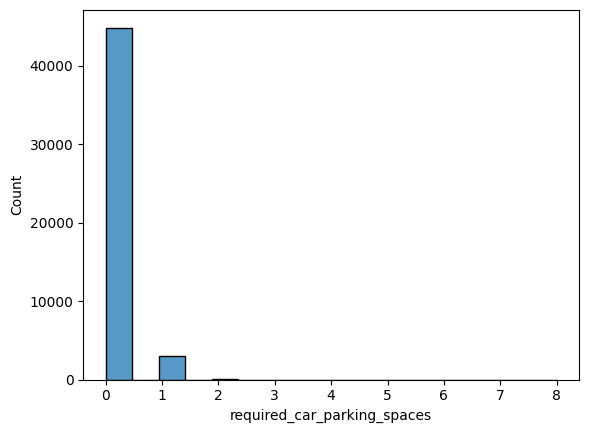

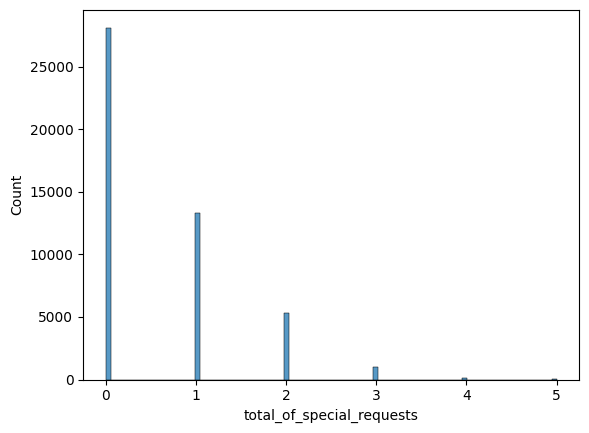

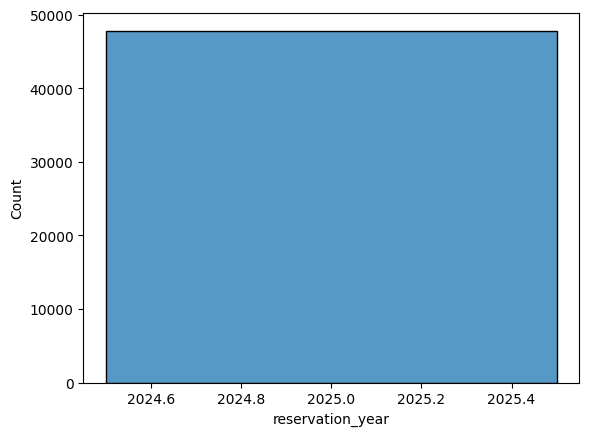

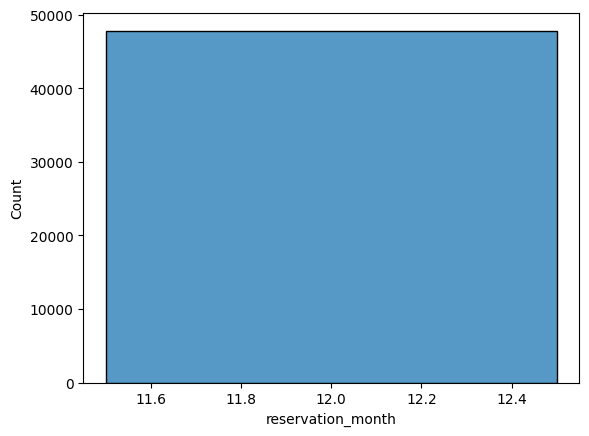

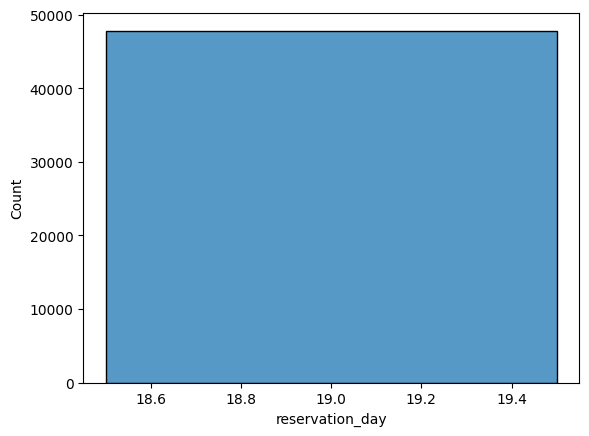

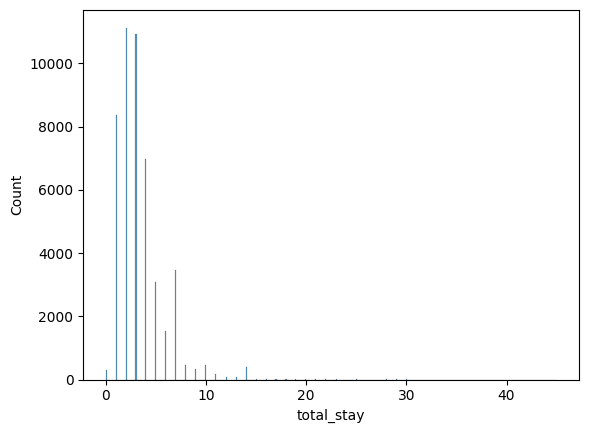

In [123]:
for i in df.select_dtypes(include= "number").columns:
  sns.histplot(data=df,x=i)
  plt.show()


/tmp/ipython-input-580760282.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='is_canceled', data=df, palette='coolwarm')


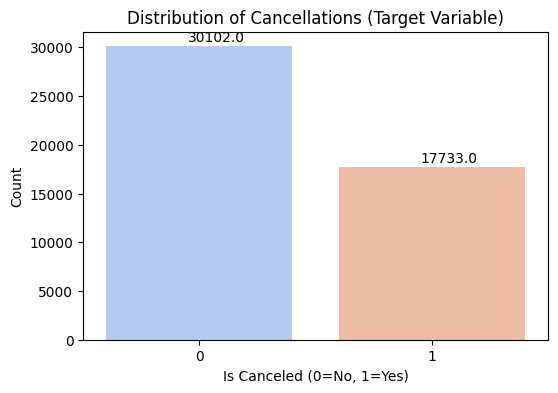

In [124]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='is_canceled', data=df, palette='coolwarm')
plt.title('Distribution of Cancellations (Target Variable)')
plt.xlabel('Is Canceled (0=No, 1=Yes)')
plt.ylabel('Count')


for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + 0.35, p.get_height() + 500))

plt.show()

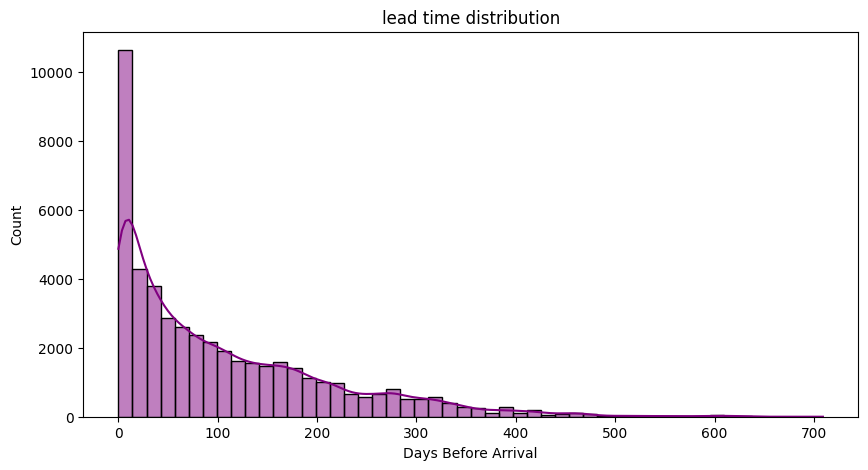

In [125]:
plt.figure(figsize=(10, 5))
sns.histplot(df['lead_time'], bins=50, kde=True, color='purple')
plt.title('lead time distribution')
plt.xlabel('Days Before Arrival')
plt.show()

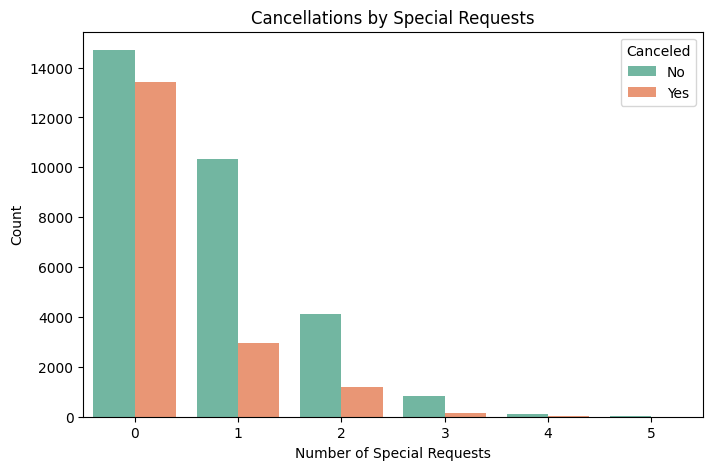

In [126]:
plt.figure(figsize=(8, 5))
sns.countplot(x='total_of_special_requests', hue='is_canceled', data=df, palette='Set2')
plt.title('Cancellations by Special Requests')
plt.xlabel('Number of Special Requests')
plt.ylabel('Count')
plt.legend(title='Canceled', labels=['No', 'Yes'])
plt.show()

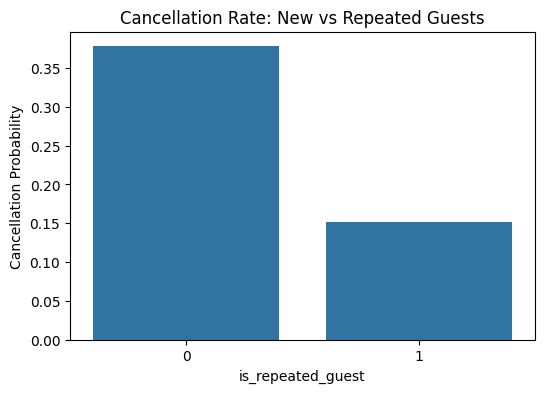

In [127]:
plt.figure(figsize=(6, 4))
sns.barplot(x='is_repeated_guest', y='is_canceled', data=df, errorbar=None)
plt.title('Cancellation Rate: New vs Repeated Guests')
plt.ylabel('Cancellation Probability')
plt.show()

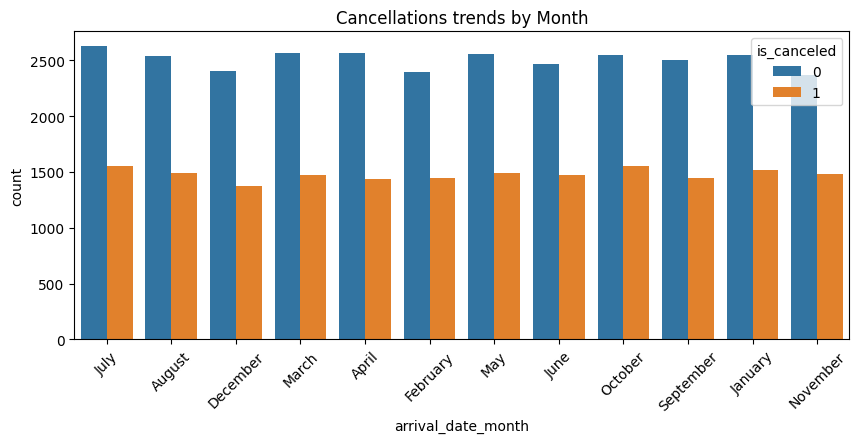

In [128]:
plt.figure(figsize=(10,4))
sns.countplot(x='arrival_date_month', hue='is_canceled', data=df)
plt.xticks(rotation=45)
plt.title("Cancellations trends by Month")
plt.show()


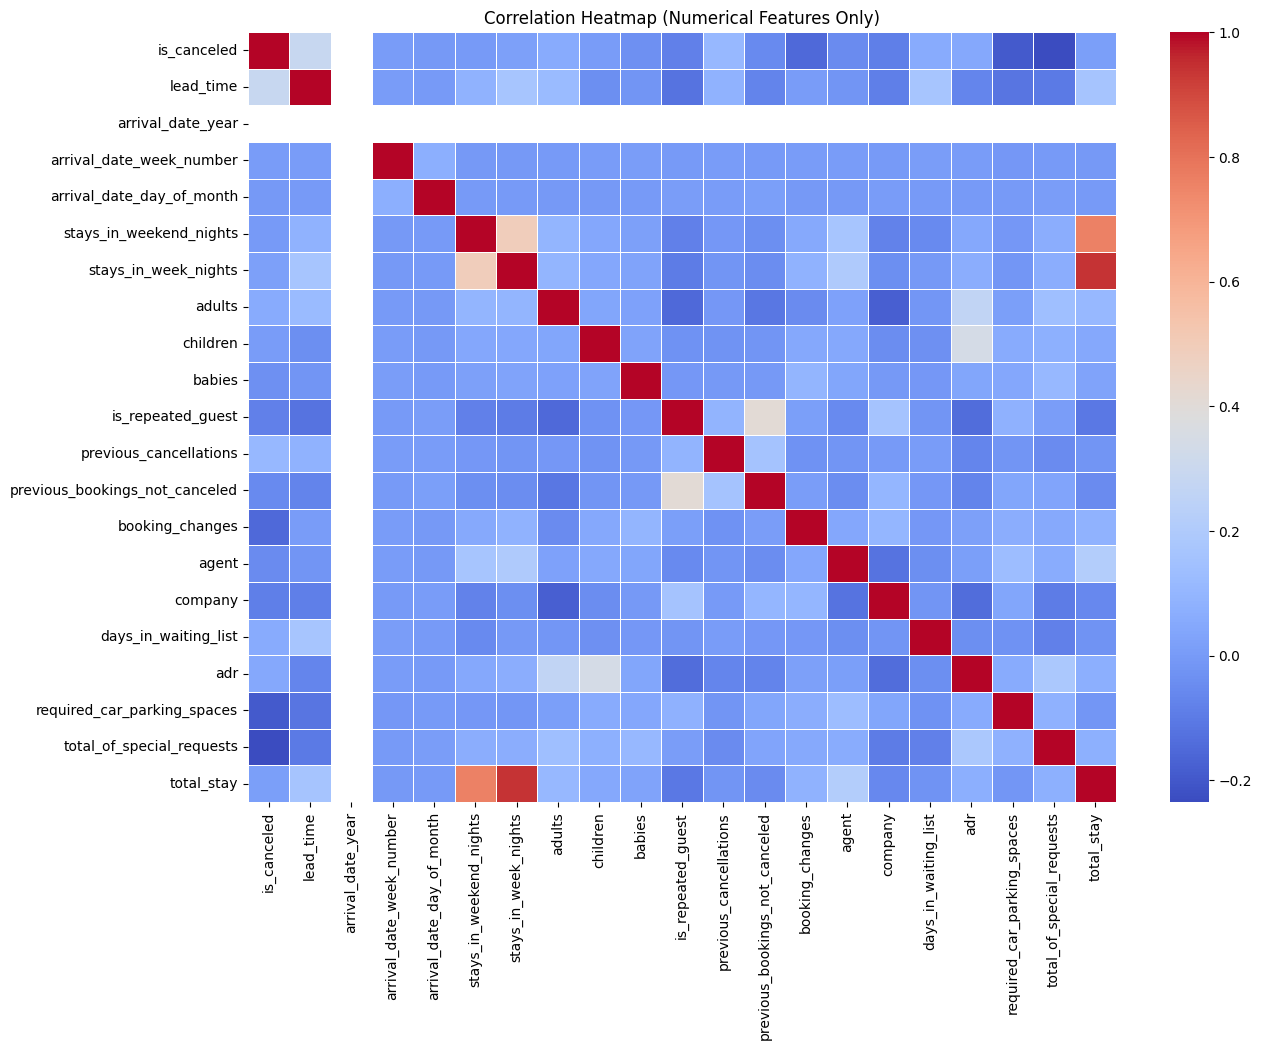

In [129]:

h = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(14,10))
sns.heatmap(h.corr(), cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap (Numerical Features Only)")
plt.show()


# Detecting outliers

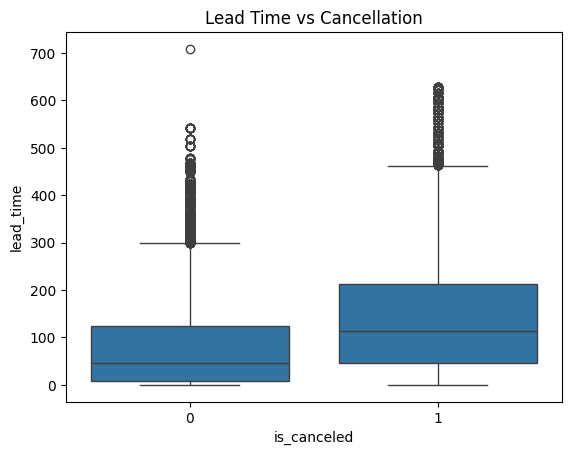

In [130]:
sns.boxplot(x='is_canceled', y='lead_time', data=df)
plt.title("Lead Time vs Cancellation")
plt.show()


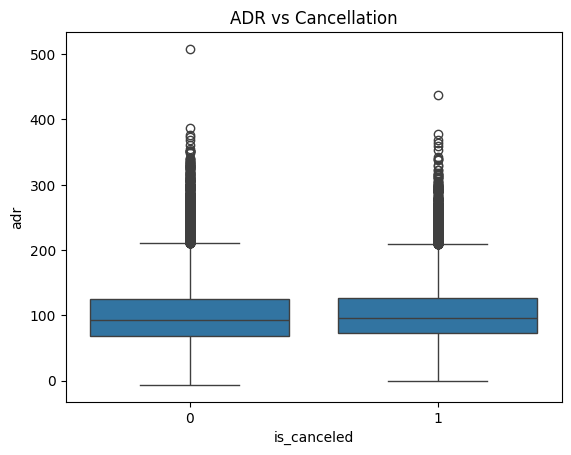

In [131]:
sns.boxplot(x='is_canceled', y='adr', data=df)
plt.title("ADR vs Cancellation")
plt.show()


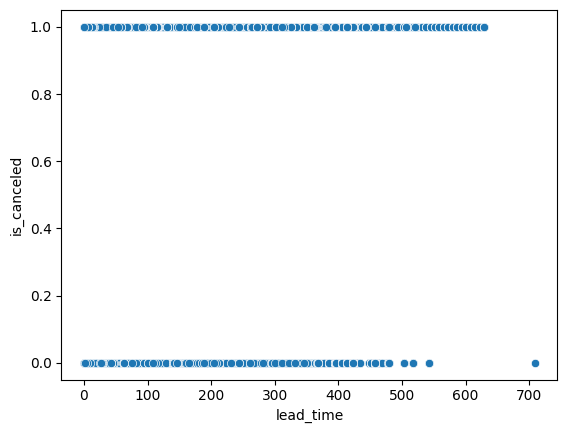

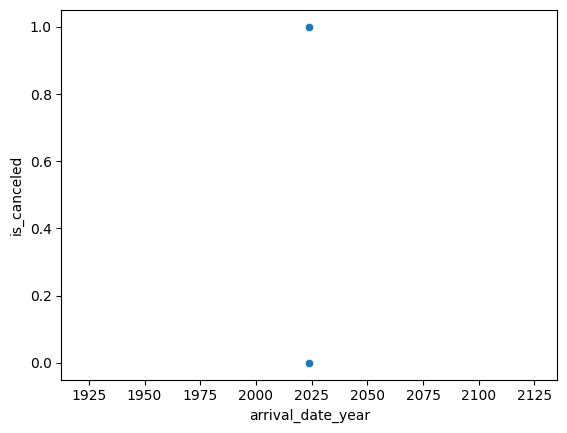

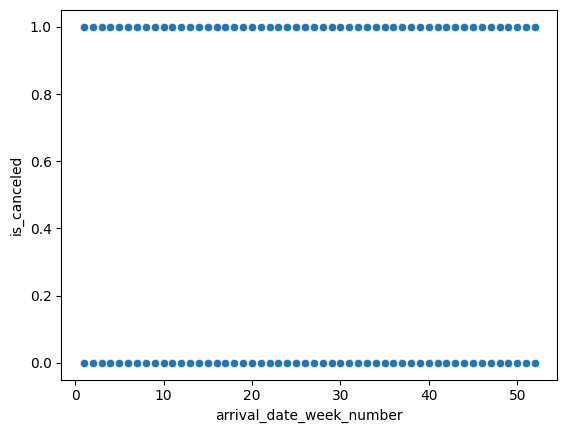

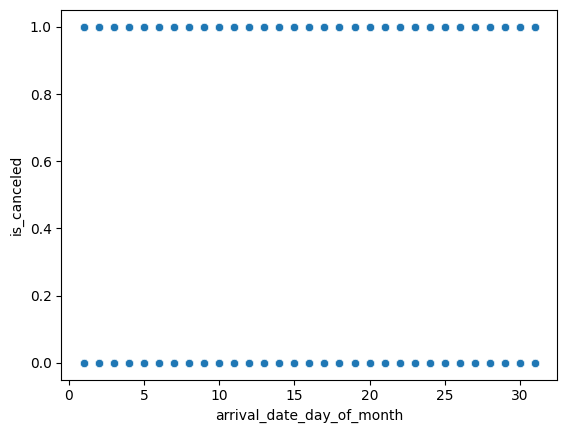

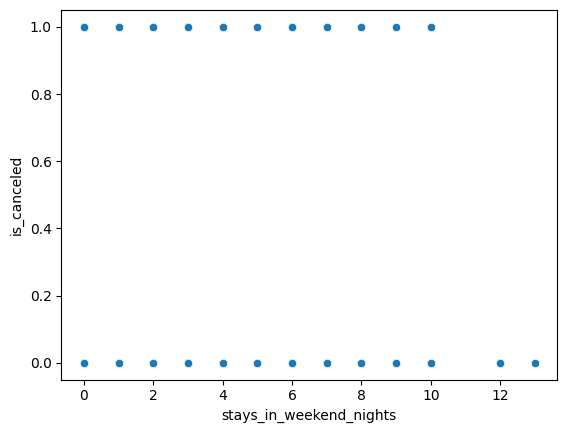

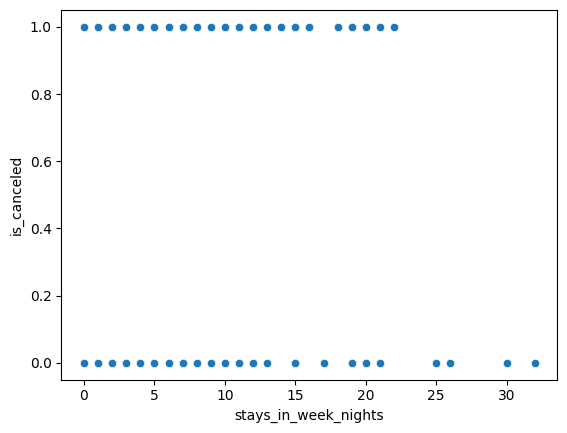

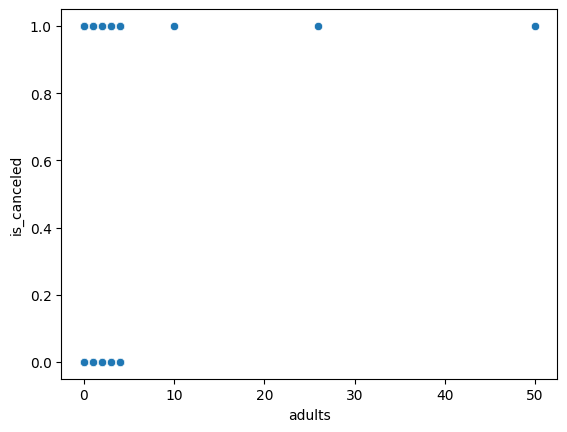

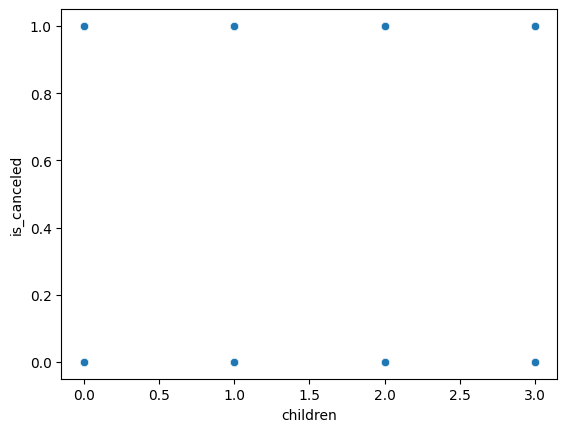

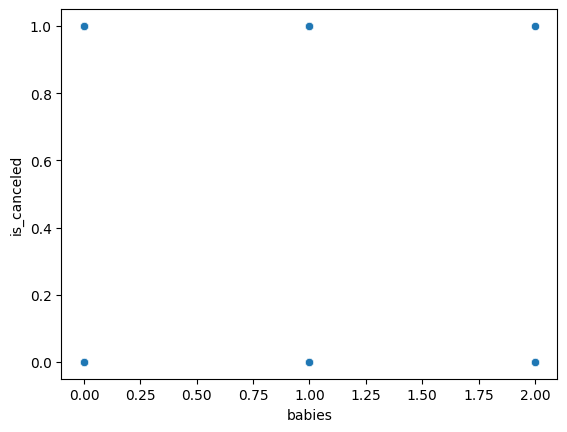

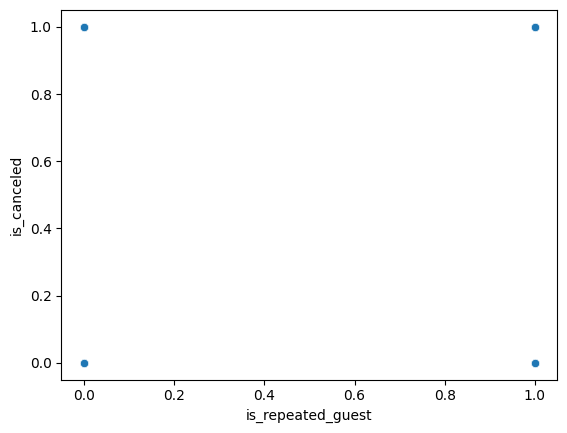

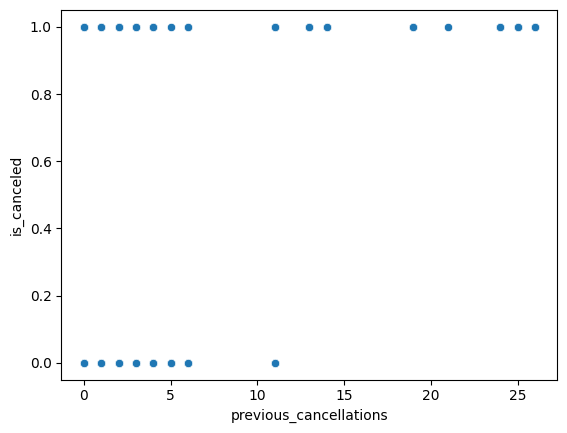

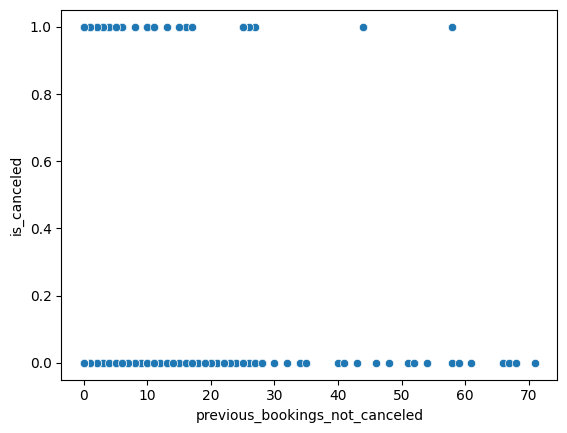

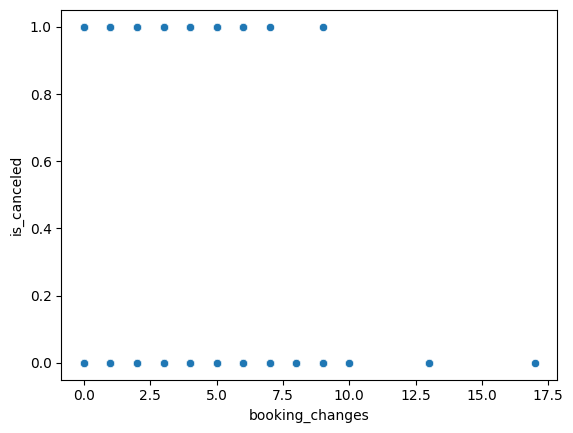

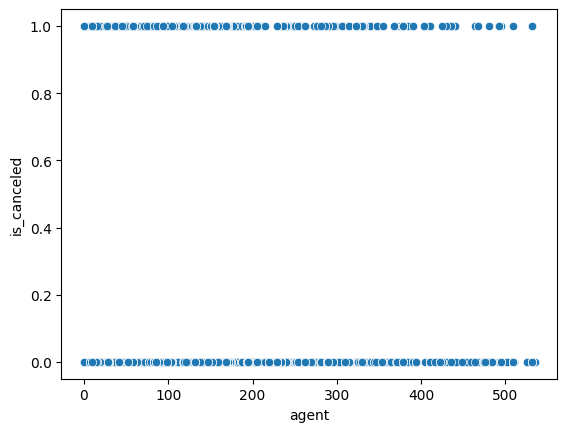

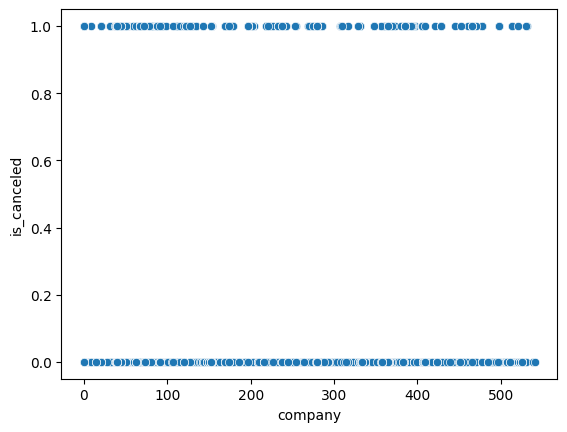

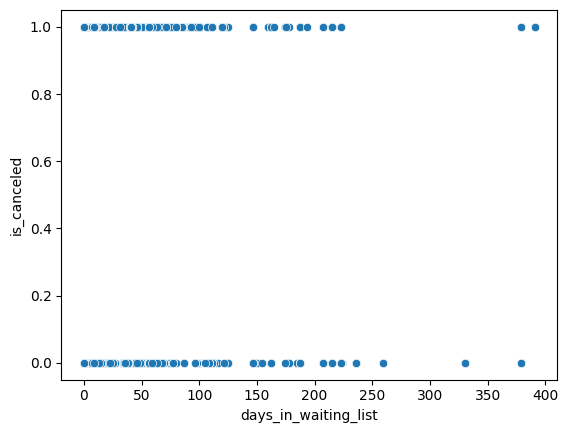

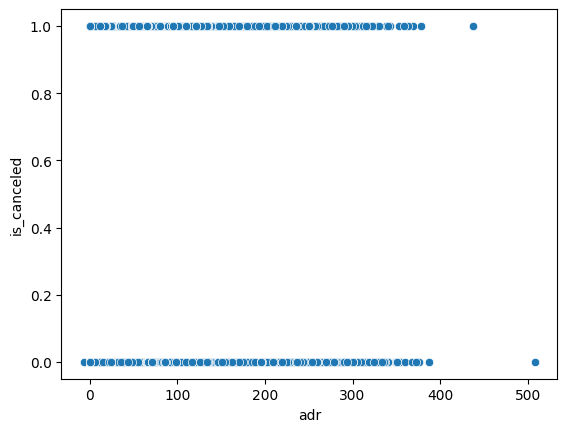

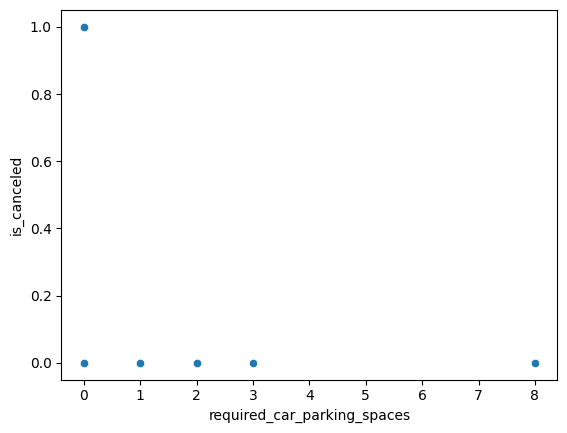

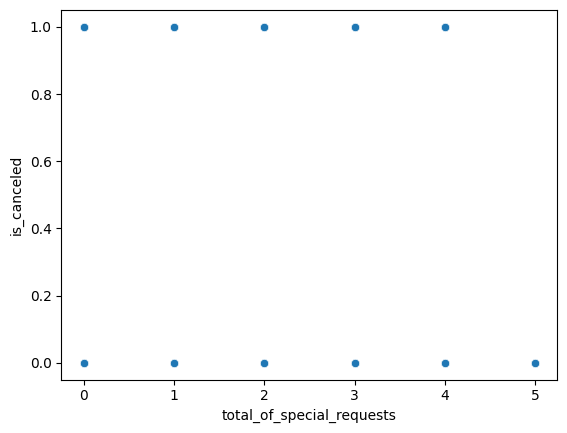

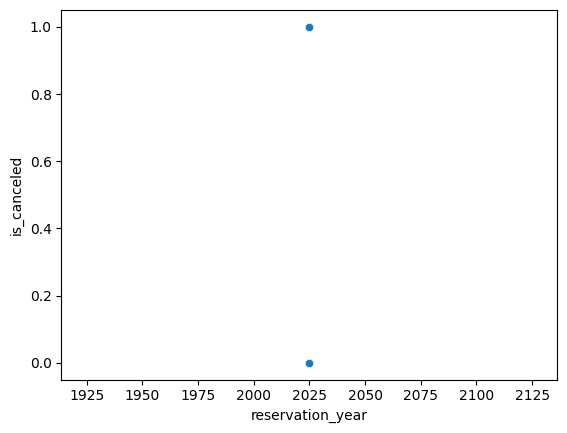

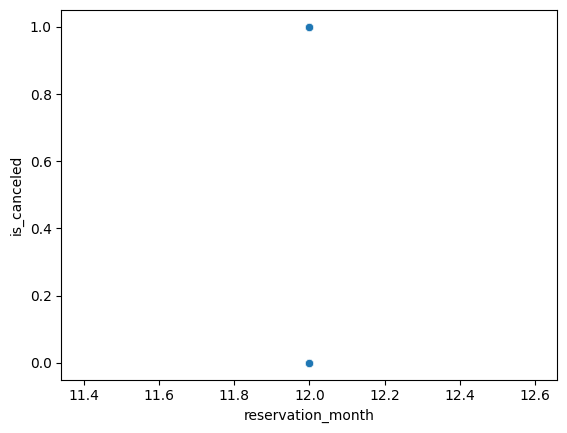

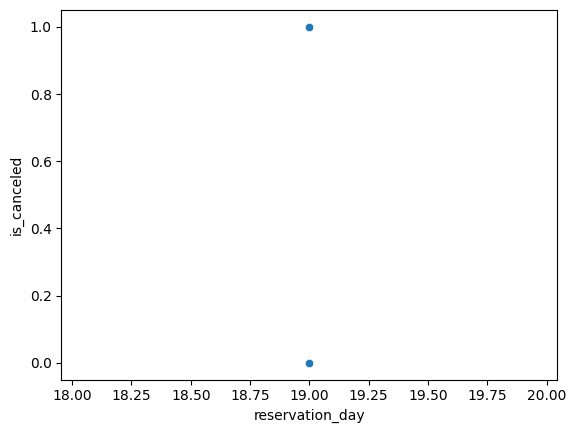

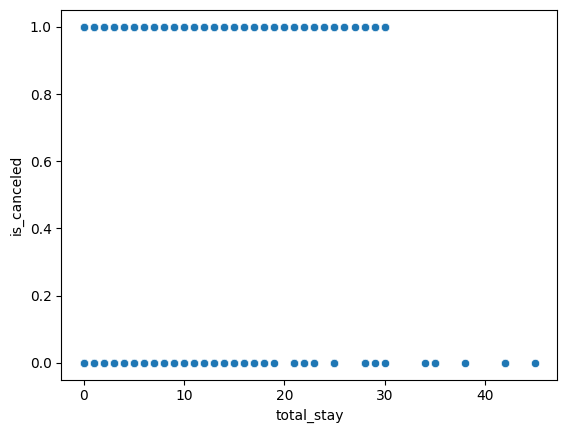

In [132]:
for i in df.select_dtypes(include = "number").columns.drop('is_canceled'):
  sns.scatterplot(data=df, x =i,y = 'is_canceled' )
  plt.show()

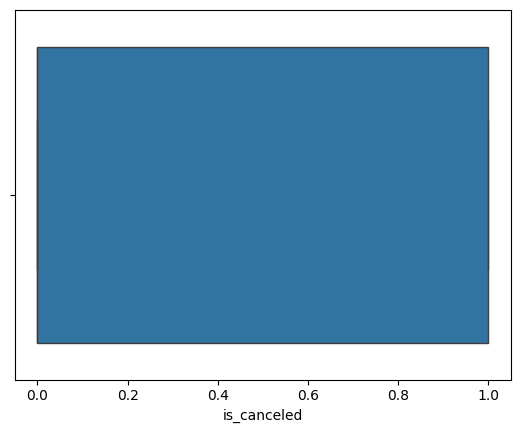

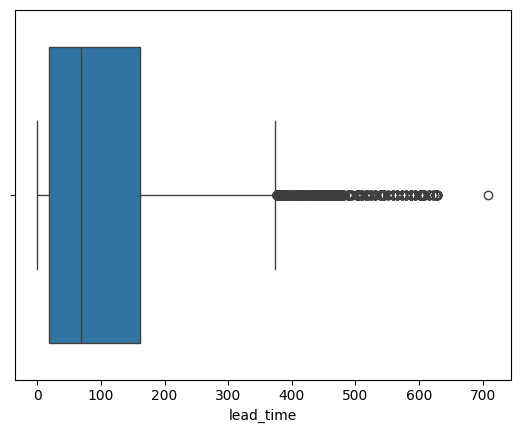

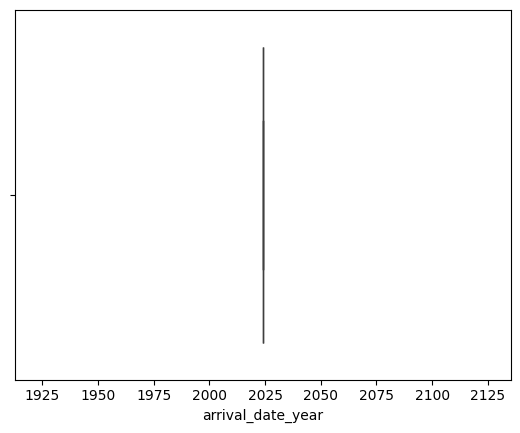

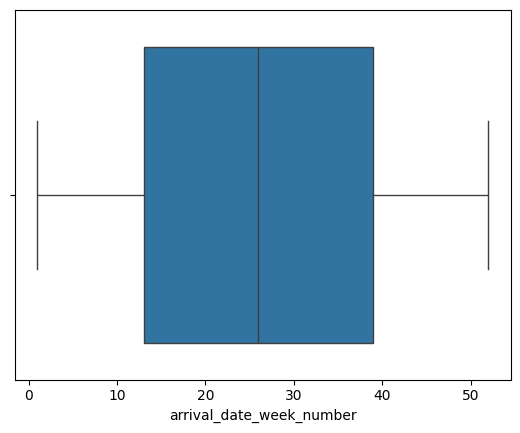

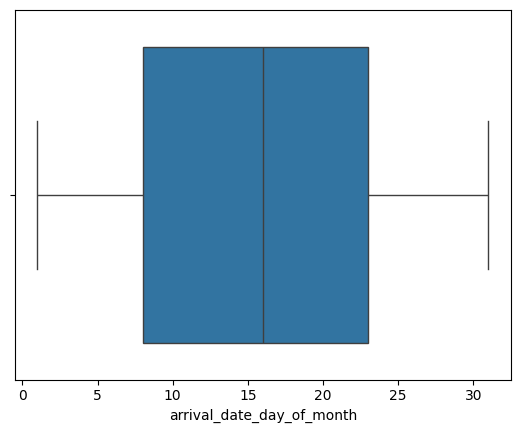

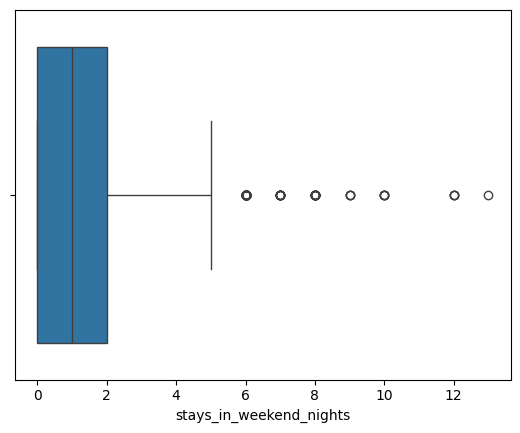

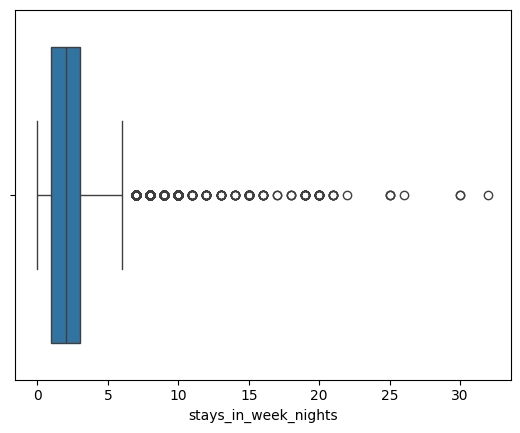

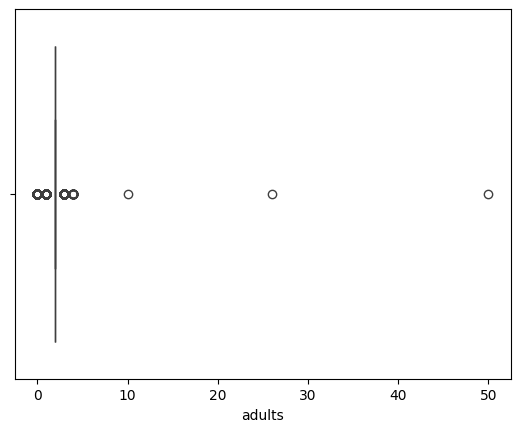

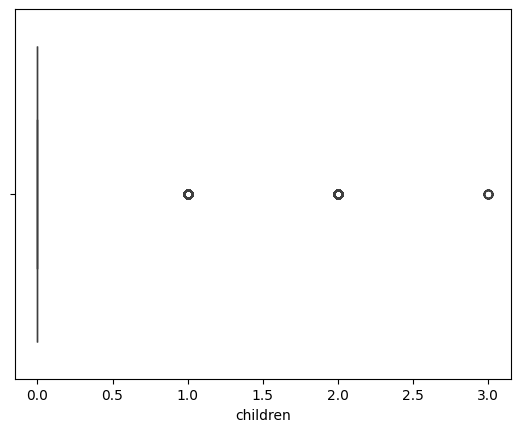

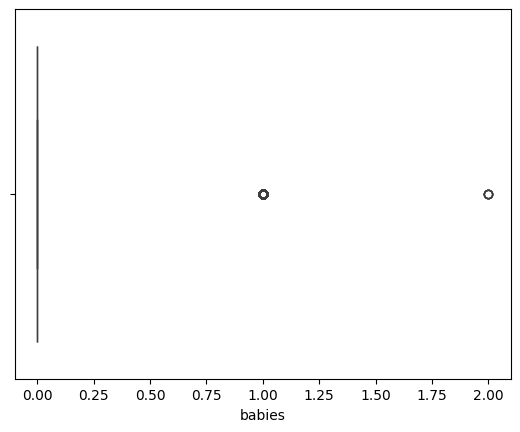

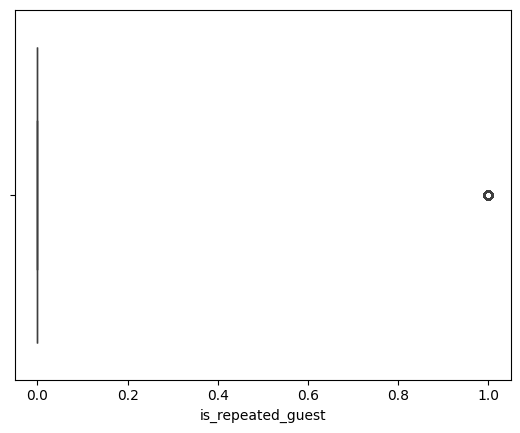

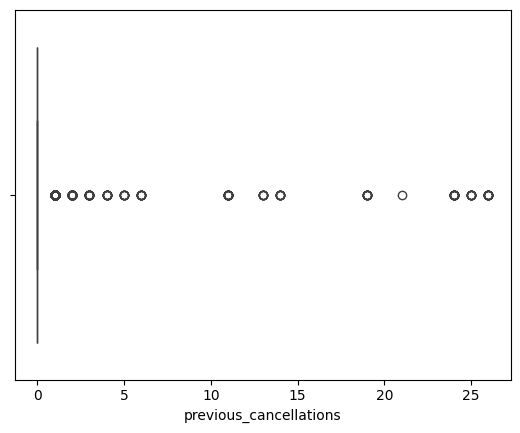

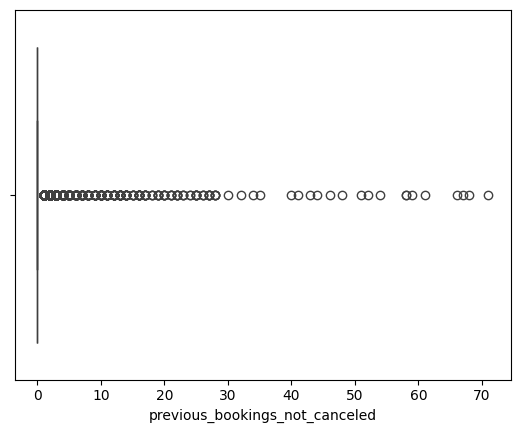

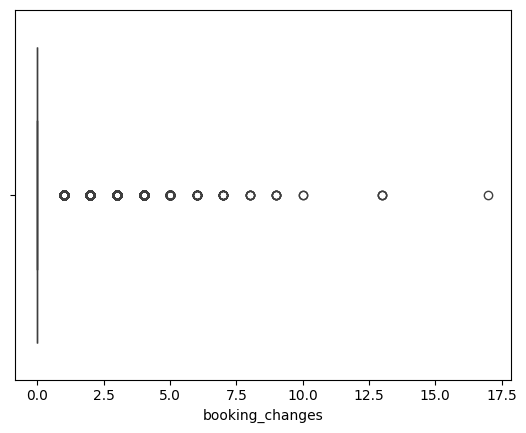

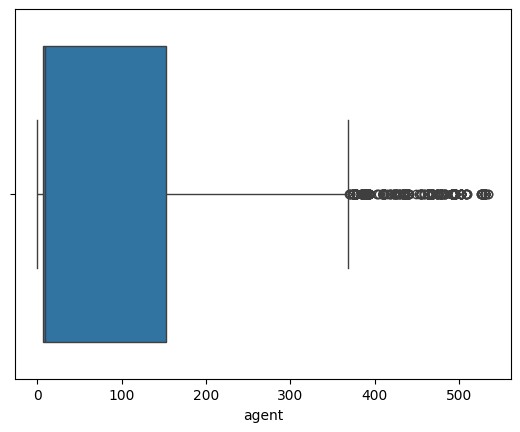

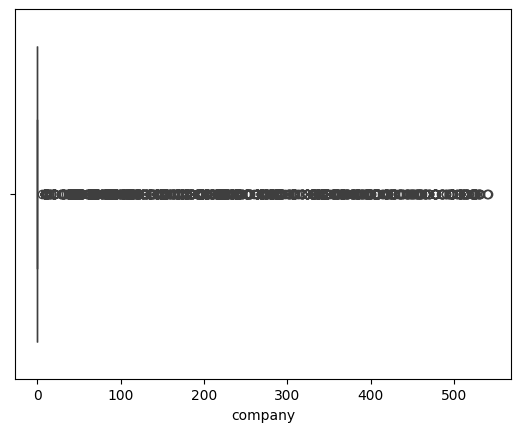

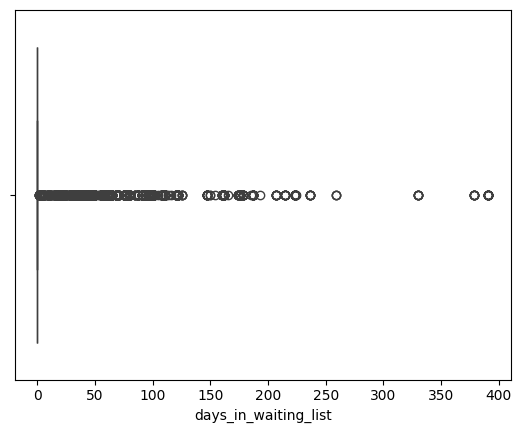

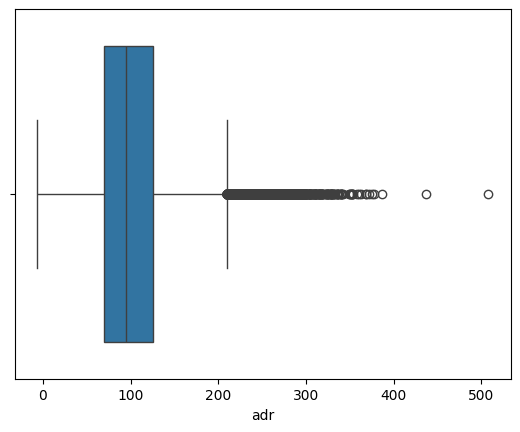

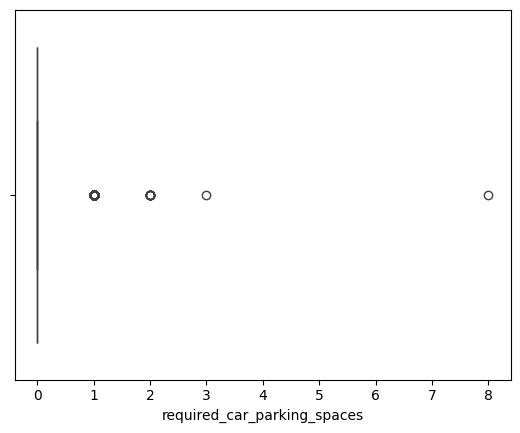

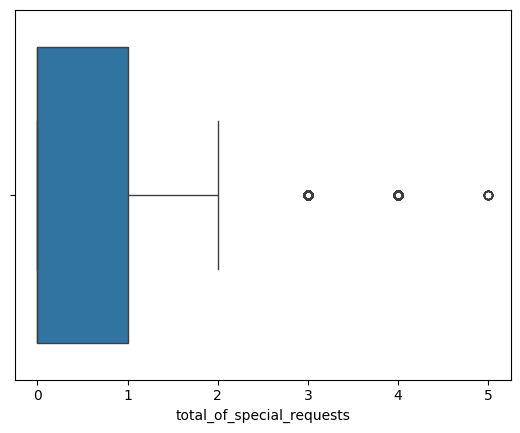

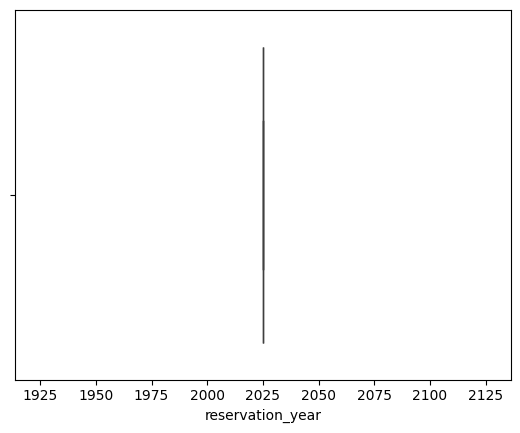

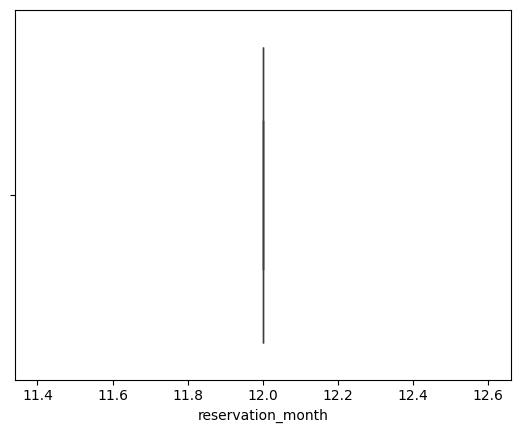

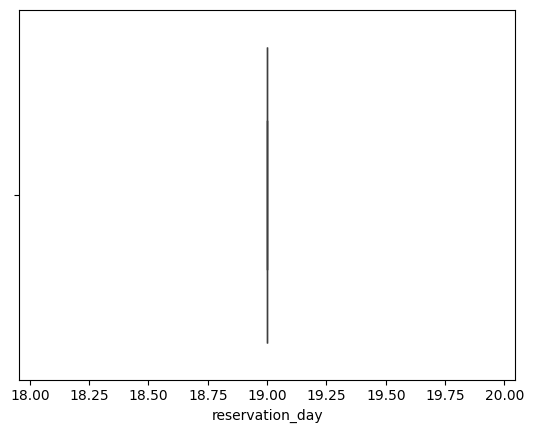

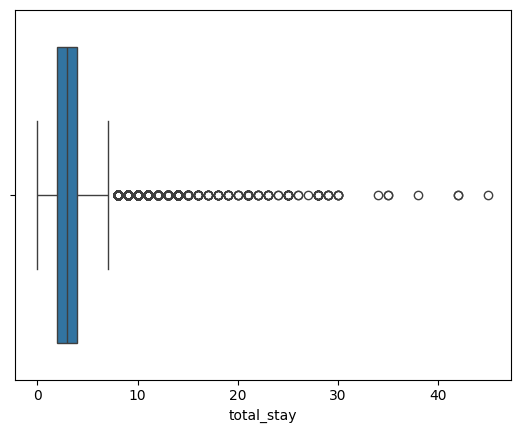

In [133]:
for i in df.select_dtypes(include= "number").columns:
  sns.boxplot(data=df,x=i)
  plt.show()

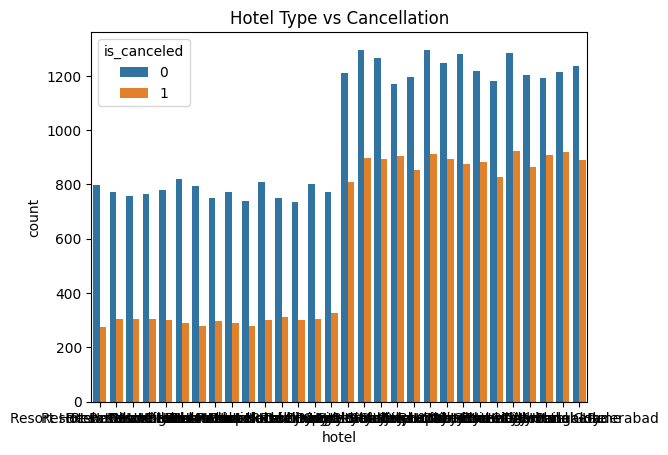

In [134]:
sns.countplot(x='hotel', hue='is_canceled', data=df)
plt.title("Hotel Type vs Cancellation")
plt.show()


# Handling Outliers

In [135]:
df = df[df['adr'] >= 0]

df = df[df['adr'] < 5000]

In [136]:
zero_guests = (df['adults'] == 0) & (df['children'] == 0) & (df['babies'] == 0)
df = df[~zero_guests]


In [137]:
df['adults'] = df['adults'].clip(upper=3)
df[~(df['adults'] == 0)]
df['children'] = df['children'].clip(upper=2)
df['babies'] = df['babies'].clip(upper=1)
df['previous_cancellations'] = df['previous_cancellations'].clip(upper=1)
df['previous_bookings_not_canceled']= df['previous_bookings_not_canceled'].clip(upper=20)
df['required_car_parking_spaces'] = df['required_car_parking_spaces'].clip(upper=1)


In [138]:
def wisker(col):
  q1,q3 = np.percentile(col,[25,75])
  iqr = q3-q1
  lw= q1- 1.5*iqr
  uw = q3 + 1.5*iqr
  return lw,uw


In [139]:
for i in ['lead_time','stays_in_weekend_nights','stays_in_week_nights']:
  lw,uw = wisker(df[i])
  df[i]= np.where(df[i] < lw,lw,df[i])
  df[i]= np.where(df[i] > uw,uw,df[i])

# Encoding

In [140]:
#us8ing label encoding to convert categorical values into numbers the model can understand

# List the columns you want to encode
categorical_columns = [
    'hotel', 'meal', 'country', 'market_segment',
    'distribution_channel', 'reserved_room_type',
    'assigned_room_type', 'deposit_type', 'customer_type'
]

# Frequency Encoding
for col in categorical_columns:

    encoding = df[col].value_counts() / len(df)

    df[col + '_freq'] = df[col].map(encoding)

# Drop the original columns so the model only sees the numbers
df.drop(columns=categorical_columns, inplace=True)

print("Frequency encoding completed for:", categorical_columns)
df.head()

Frequency encoding completed for: ['hotel', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type']


,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,total_stay,hotel_freq,meal_freq,country_freq,market_segment_freq,distribution_channel_freq,reserved_room_type_freq,assigned_room_type_freq,deposit_type_freq,customer_type_freq
0,0,342.0,2024,July,30,27,0.0,0.0,2,0.0,...,0,0.022425,0.772131,0.405046,0.104188,0.120708,0.007580,0.019577,0.876633,0.750649
3,0,13.0,2024,August,33,14,0.0,1.0,1,0.0,...,1,0.022550,0.772131,0.102973,0.045080,0.056868,0.719389,0.620038,0.876633,0.750649
9,1,75.0,2024,December,51,18,0.0,3.0,2,0.0,...,3,0.022236,0.121294,0.405046,0.201675,0.820833,0.160867,0.213003,0.876633,0.750649
11,0,35.0,2024,March,13,27,0.0,4.0,2,0.0,...,4,0.022341,0.121294,0.405046,0.475879,0.820833,0.160867,0.213003,0.876633,0.750649
17,0,12.0,2024,December,51,17,0.0,1.0,2,0.0,...,1,0.022341,0.772131,0.027910,0.475879,0.820833,0.719389,0.066436,0.876633,0.750649


In [141]:
#Categorical column encoding

cols_to_encode = [
    'arrival_date_month'
]


for col in cols_to_encode:

    freq_map = df[col].value_counts(normalize=True)


    df[col] = df[col].map(freq_map)

print(f"New shape after frequency encoding: {df.shape}")
print(df.columns)
df.head()




New shape after frequency encoding: (47760, 35)
Index(['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'city', 'reservation_year',
       'reservation_month', 'reservation_day', 'total_stay', 'hotel_freq',
       'meal_freq', 'country_freq', 'market_segment_freq',
       'distribution_channel_freq', 'reserved_room_type_freq',
       'assigned_room_type_freq', 'deposit_type_freq', 'customer_type_freq'],
      dtype='object')


,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,total_stay,hotel_freq,meal_freq,country_freq,market_segment_freq,distribution_channel_freq,reserved_room_type_freq,assigned_room_type_freq,deposit_type_freq,customer_type_freq
0,0,342.0,2024,0.087374,30,27,0.0,0.0,2,0.0,...,0,0.022425,0.772131,0.405046,0.104188,0.120708,0.007580,0.019577,0.876633,0.750649
3,0,13.0,2024,0.084276,33,14,0.0,1.0,1,0.0,...,1,0.022550,0.772131,0.102973,0.045080,0.056868,0.719389,0.620038,0.876633,0.750649
9,1,75.0,2024,0.078894,51,18,0.0,3.0,2,0.0,...,3,0.022236,0.121294,0.405046,0.201675,0.820833,0.160867,0.213003,0.876633,0.750649
11,0,35.0,2024,0.084401,13,27,0.0,4.0,2,0.0,...,4,0.022341,0.121294,0.405046,0.475879,0.820833,0.160867,0.213003,0.876633,0.750649
17,0,12.0,2024,0.078894,51,17,0.0,1.0,2,0.0,...,1,0.022341,0.772131,0.027910,0.475879,0.820833,0.719389,0.066436,0.876633,0.750649


# Target Balance Check + SMOTE

In [142]:
from collections import Counter
print("Before SMOTE:", Counter(df['is_canceled']))


Before SMOTE: Counter({0: 30036, 1: 17724})


In [143]:
#smote used to balance data by creating synthetic "canceled" examples to avoid model bias

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

X = df.drop(['is_canceled', 'city'], axis=1)
y = df['is_canceled']

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

print("After SMOTE:", Counter(y_train))

After SMOTE: Counter({0: 21025, 1: 21025})


#Feature Selection using Genetic Algorithm

In [144]:
!pip install sklearn-genetic scikit-learn==1.3.2

In [145]:
from sklearn.tree import DecisionTreeClassifier
from genetic_selection import GeneticSelectionCV


print("running Genetic Algorithm")
estimator = DecisionTreeClassifier(random_state=42)


selector = GeneticSelectionCV(
    estimator,
    cv=3,
    verbose=1,
    scoring="accuracy",
    max_features=33,
    n_population=60,
    n_generations=8,
    crossover_proba=0.5,
    mutation_proba=0.2,
    n_jobs=-1
)


print("Starting Evolution...")
selector.fit(X_train, y_train)


print("\nOptimization Complete.")

selected_features = X.columns[selector.support_]

print(f"Selected {len(selected_features)} Features:")
print(list(selected_features))



running Genetic Algorithm
Starting Evolution...
Selecting features with genetic algorithm.
gen	nevals	avg                               	std                               	min                            	max                               
0  	60    	[  0.729431  15.9        0.031172]	[  0.100149  11.401316   0.027653]	[ 0.499976  1.        0.000017]	[  0.830845  33.         0.148708]
1  	30    	[  0.813583  26.816667   0.02491 ]	[ 0.023863  6.76878   0.004799]   	[ 0.726992  8.        0.015381]	[  0.832557  33.         0.044091]
2  	32    	[  0.828114  30.933333   0.024474]	[ 0.007171  1.547758  0.001577]   	[  0.782236  26.         0.020759]	[  0.832557  33.         0.029694]
3  	36    	[  0.829135  30.1        0.023798]	[ 0.007244  1.535144  0.001766]   	[  0.782498  27.         0.020592]	[  0.833437  33.         0.026671]
4  	35    	[  0.830856  29.283333   0.023083]	[ 0.003099  1.461639  0.001911]   	[  0.813508  25.         0.01605 ]	[  0.833437  32.         0.026267]
5  	40    	[

In [146]:
print(f"Best Accuracy Score: {selector.generation_scores_[-1]:.4f}")

print("\nAccuracy progress per generation:")
for i, score in enumerate(selector.generation_scores_):
    print(f"Generation {i+1}: {score:.4f}")

Best Accuracy Score: 0.8349

Accuracy progress per generation:
Generation 1: 0.8308
Generation 2: 0.8326
Generation 3: 0.8326
Generation 4: 0.8334
Generation 5: 0.8334
Generation 6: 0.8336
Generation 7: 0.8349
Generation 8: 0.8349
Generation 9: 0.8349


In [147]:

X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_val_df   = pd.DataFrame(X_val, columns=X.columns)
X_test_df  = pd.DataFrame(X_test, columns=X.columns)


X_train_ga = X_train_df[selected_features]
X_val_ga   = X_val_df[selected_features]
X_test_ga  = X_test_df[selected_features]


# KNN

Best K found on Validation set: 6

--- KNN Performance Metrics ---
Accuracy:  0.8185
Precision: 0.7513
Recall:    0.7637
F1 Score:  0.7575


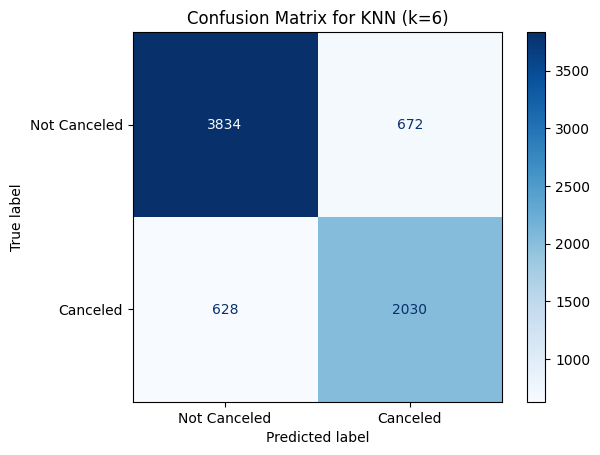

In [148]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay


best_k = 1
best_val_score = 0

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_ga, y_train)
    val_score = knn.score(X_val_ga, y_val)

    if val_score > best_val_score:
        best_val_score = val_score
        best_k = k

print(f"Best K found on Validation set: {best_k}")


final_knn = KNeighborsClassifier(n_neighbors=best_k)
final_knn.fit(X_train_ga, y_train)
y_pred = final_knn.predict(X_test_ga)

print("\n--- KNN Performance Metrics ---")
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score:  {f1_score(y_test, y_pred):.4f}")


cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Canceled', 'Canceled'])
disp.plot(cmap=plt.cm.Blues)
plt.title(f"Confusion Matrix for KNN (k={best_k})")
plt.show()

# Decision Tree

Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 5}

--- Decision Tree Performance Metrics ---
Accuracy:  0.8191
Precision: 0.7152
Recall:    0.8514
F1 Score:  0.7774


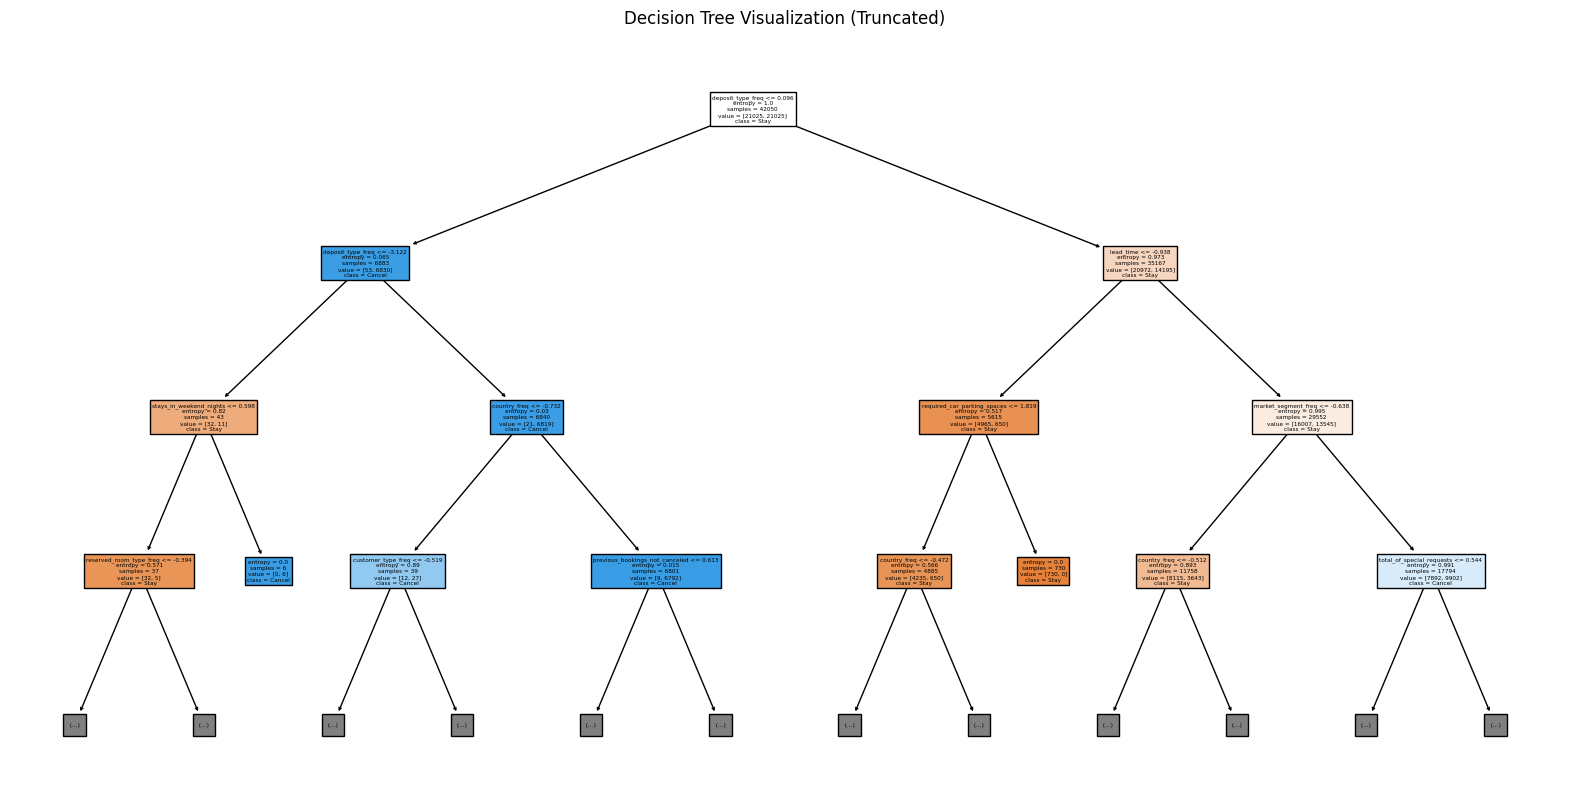

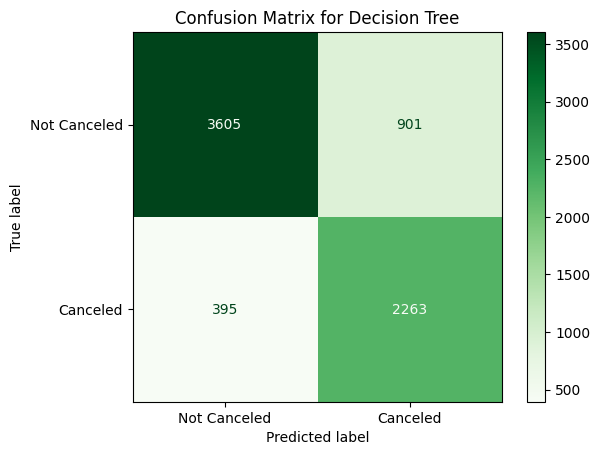

In [ ]:
    from sklearn.tree import DecisionTreeClassifier, plot_tree
    from sklearn.model_selection import GridSearchCV
    from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
    import matplotlib.pyplot as plt


    param_grid = {
        'max_depth': [3, 5, 10, None],
        'min_samples_split': [2, 5, 10],
        'criterion': ['gini', 'entropy']
    }

    dt_clf = DecisionTreeClassifier(random_state=42)
    grid_search = GridSearchCV(dt_clf, param_grid, cv=3, scoring='accuracy')
    grid_search.fit(X_val_ga, y_val)

    best_dt = grid_search.best_estimator_
    print(f"Best Parameters: {grid_search.best_params_}")


    best_dt.fit(X_train_ga, y_train)
    y_pred_dt = best_dt.predict(X_test_ga)

    print("\n--- Decision Tree Performance Metrics ---")
    print(f"Accuracy:  {accuracy_score(y_test, y_pred_dt):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred_dt):.4f}")
    print(f"Recall:    {recall_score(y_test, y_pred_dt):.4f}")
    print(f"F1 Score:  {f1_score(y_test, y_pred_dt):.4f}")


    plt.figure(figsize=(20,10))
    plot_tree(best_dt, max_depth=3, feature_names=X_train_ga.columns.tolist(), class_names=['Stay', 'Cancel'], filled=True)
    plt.title("Decision Tree Visualization (Truncated)")
    plt.show()


    cm_dt = confusion_matrix(y_test, y_pred_dt)
    disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=['Not Canceled', 'Canceled'])
    disp_dt.plot(cmap=plt.cm.Greens)
    plt.title("Confusion Matrix for Decision Tree")
    plt.show()

# Neural Network

In [150]:
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train_ga.shape[1],)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


print("Training Neural Network model...")
history = model.fit(
    X_train_ga,
    y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val_ga, y_val),
    verbose=1
)
print("Training complete.")


y_proba_val_nn = model.predict(X_val_ga).flatten()
y_pred_val_nn = (y_proba_val_nn > 0.5).astype(int)


print("\n--- Neural Network Model Evaluation (Validation Set) ---")
print(f"Accuracy: {accuracy_score(y_val, y_pred_val_nn):.4f}")
print(f"Precision: {precision_score(y_val, y_pred_val_nn):.4f}")
print(f"Recall: {recall_score(y_val, y_pred_val_nn):.4f}")
print(f"F1: {f1_score(y_val, y_pred_val_nn):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_val, y_proba_val_nn):.4f}")

Training Neural Network model...
Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1315/1315 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7686 - loss: 0.4540 - val_accuracy: 0.8276 - val_loss: 0.3645
Epoch 2/20
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8208 - loss: 0.3683 - val_accuracy: 0.8268 - val_loss: 0.3681
Epoch 3/20
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8212 - loss: 0.3604 - val_accuracy: 0.8377 - val_loss: 0.3499
Epoch 4/20
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8241 - loss: 0.3517 - val_accuracy: 0.8338 - val_loss: 0.3517
Epoch 5/20
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8274 - loss: 0.3514 - val_accuracy: 0.8303 - val_loss: 0.3520
Epoch 6/20
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8312 - loss: 0.3426 - val_accuracy: 0.8386 - val_loss: 0.3447
Epoch 7/20
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8308 - loss: 0.3445 - val_accuracy: 0.8310 - val_loss: 0.3516
Epoch 8/20
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8336 - loss: 0.3398 - val_accurac

#Performance Evaluation

In [151]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def evaluate(y_true, y_pred, name):
    print(f"\n{name}")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1:", f1_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))


In [152]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

nn_test_proba = model.predict(X_test_ga).flatten()
nn_test_pred = (nn_test_proba > 0.5).astype(int)

evaluate(y_test, y_pred, "KNN + GA")
evaluate(y_test, y_pred_dt, "Decision Tree + GA")
evaluate(y_test, nn_test_pred, "Neural Network + GA")

224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 856us/step

KNN + GA
Accuracy: 0.818537130094919
Precision: 0.7512953367875648
Recall: 0.763732129420617
F1: 0.7574626865671642
Confusion Matrix:
 [[3834  672]
 [ 628 2030]]

Decision Tree + GA
Accuracy: 0.8190954773869347
Precision: 0.7152338811630847
Recall: 0.8513920240782543
F1: 0.7773960838199931
Confusion Matrix:
 [[3605  901]
 [ 395 2263]]

Neural Network + GA
Accuracy: 0.8431044109436069
Precision: 0.7847067557535263
Recall: 0.7953348382242288
F1: 0.789985052316891
Confusion Matrix:
 [[3926  580]
 [ 544 2114]]


In [153]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

models = ['KNN', 'Decision Tree', 'Neural Network']

accuracy = [
    accuracy_score(y_test, y_pred),
    accuracy_score(y_test, y_pred_dt),
    accuracy_score(y_test, nn_test_pred)
]

precision = [
    precision_score(y_test, y_pred),
    precision_score(y_test, y_pred_dt),
    precision_score(y_test, nn_test_pred)
]

recall = [
    recall_score(y_test, y_pred),
    recall_score(y_test, y_pred_dt),
    recall_score(y_test, nn_test_pred)
]

f1 = [
    f1_score(y_test, y_pred),
    f1_score(y_test, y_pred_dt),
    f1_score(y_test, nn_test_pred)
]

In [154]:
#Final model comparison table
results_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
})

results_df


,Model,Accuracy,Precision,Recall,F1 Score
0,KNN,0.818537,0.751295,0.763732,0.757463
1,Decision Tree,0.819095,0.715234,0.851392,0.777396
2,Neural Network,0.843104,0.784707,0.795335,0.789985


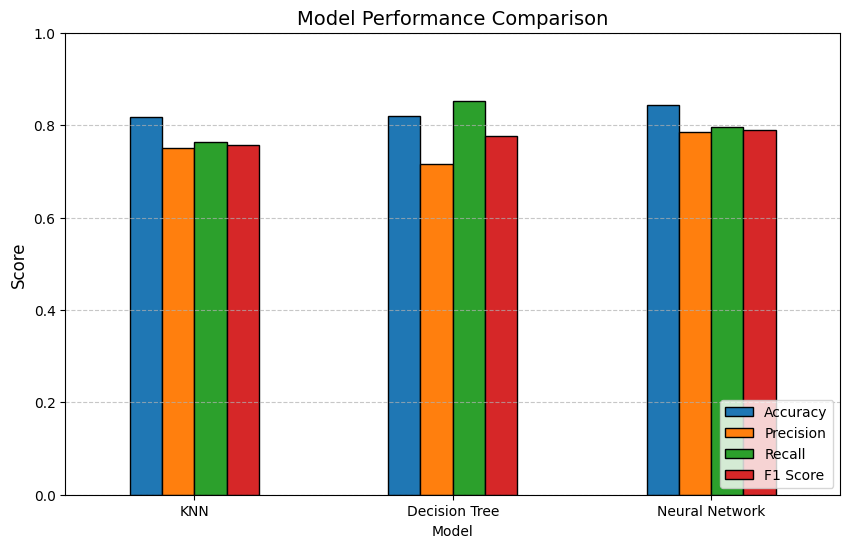

In [155]:
results_df.set_index('Model').plot(
    kind='bar',
    figsize=(10,6),
    edgecolor='black'
)

plt.title("Model Performance Comparison", fontsize=14)
plt.ylabel("Score", fontsize=12)
plt.ylim(0,1)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='lower right')
plt.show()


In [156]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def evaluate_model_on_test(model, X_test, y_test, model_name):
    """
    Evaluates a given model on the test set and prints metrics, including a confusion matrix.
    """
    print(f"\n--- {model_name} Model Evaluation (Test Set) ---")


    if hasattr(model, 'predict_proba'):
        y_proba_test = model.predict_proba(X_test)[:, 1]
    else:

        y_proba_test = model.predict(X_test).flatten()


    y_pred_test = (y_proba_test > 0.5).astype(int) if len(y_proba_test.shape) > 1 or model_name == 'Neural Network' else model.predict(X_test)

    print(f"Accuracy: {accuracy_score(y_test, y_pred_test):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred_test):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred_test):.4f}")
    print(f"F1-Score: {f1_score(y_test, y_pred_test):.4f}")
    print(f"ROC AUC Score: {roc_auc_score(y_test, y_proba_test):.4f}")


    cm = confusion_matrix(y_test, y_pred_test)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Canceled', 'Canceled'])
    fig, ax = plt.subplots(figsize=(6, 6))
    disp.plot(cmap=plt.cm.Blues, ax=ax)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()



--- K-Nearest Neighbors Model Evaluation (Test Set) ---
Accuracy: 0.8185
Precision: 0.7513
Recall: 0.7637
F1-Score: 0.7575
ROC AUC Score: 0.8932


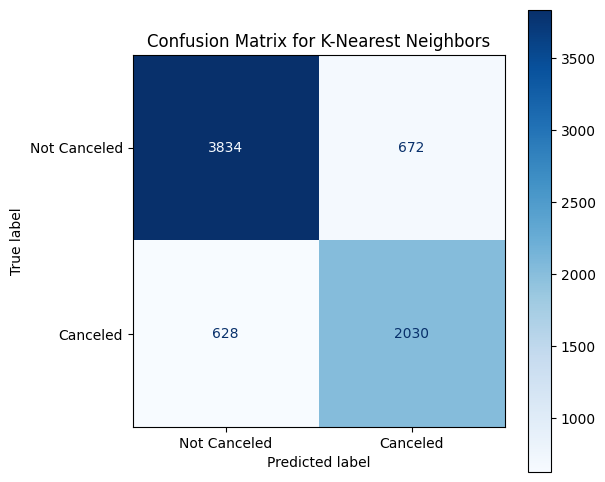


--- Decision Tree Model Evaluation (Test Set) ---
Accuracy: 0.8191
Precision: 0.7152
Recall: 0.8514
F1-Score: 0.7774
ROC AUC Score: 0.9162


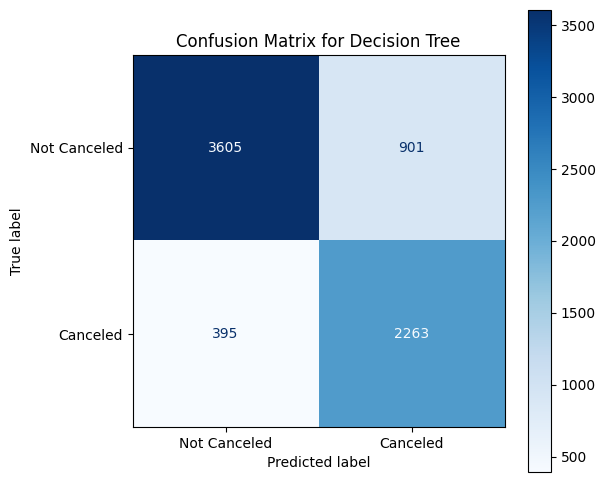


--- Neural Network Model Evaluation (Test Set) ---
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 948us/step
Accuracy: 0.8431
Precision: 0.7847
Recall: 0.7953
F1-Score: 0.7900
ROC AUC Score: 0.9266


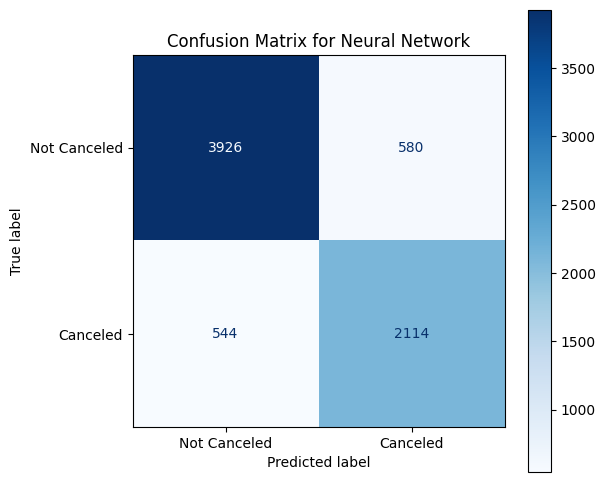

In [157]:

evaluate_model_on_test(final_knn, X_test_ga, y_test, 'K-Nearest Neighbors')
evaluate_model_on_test(best_dt, X_test_ga, y_test, 'Decision Tree')
evaluate_model_on_test(model, X_test_ga, y_test, 'Neural Network')